# Projekt 2 - Elmentett hőmérséklet ábrázolása

Sikerült elkészítened a szüleidnek a programot ami elmenti egy fájlba az egy időszakban mért hőmérsékleti eredményeket. A szüleid egyszerre örültek is és méltatlankodtak az eredményen. Örültek, mert büszkék voltak rád, hogy meg tudtad csinálni, de méltatlankodtak, mert a vesszővel elválasztott számok számukra kicsit zagyvaságnak tűnt. Nehezen látták át. Mivel vizuális típusok a szüleid, megkértek, hogy ábrázold egy grafikonon a fájl tartalmát, azaz a hőmérsékletet Celsius fokban az idő függvényében.

## Mit fogsz készíteni?

Ehhez a projekthez már nincs szükség a szenzorra. Egy kódot kell írni ami beolvassa az adatokat a *csv* fájlból és ábrázolja azt egy grafikonon, ahol az *x* tengely az idővonalat, az *y* tengely pedig a hőmérsékletet képviseli Celsius fokban. 

## Mit tanulsz meg?

Az ábrázolós projekt elkészítésével a következőket tanulod meg:

* Hogyan olvassuk ki egy szöveges fájl tartalmát az ```open``` parancs használatával.
* Hogyan nyerjünk ki hasznos információt egy *csv* fájlból.
* Hogyan kezeljük a dátum formátumokat a ```datetime``` csomag segítségével.
* Hogyan ábrázoljuk az adatokat a ```matplotlib``` csomag segítségével.

## A projekt részletekre bontása

* Beimportálni a ```matplotlib``` és a ```datetime``` csomagokat.
* Kiolvasni az elmentett fájl tartalmát az ```open``` parancs segítségével.
* Definiálni egy függvényt ami a kiolvasott sorokból egyenként kinyeri a hőmérsékletet és a kiolvasás időpontját.
* Az időpontot vissza kell alakítani *string* formátumból *datetime* formátumba (ábrázolás miatt).
* Ábrázolni a kinyert adatokat a *matplotlib* segítségével.
* Bekonfigurálni az *x* tengelyt, hogy értelmes időintervallumot mutasson.

## Áramköri elemek listája

Nincs

## A kapcsolási rajz

<img src="" width=600 height=400 />

Nincs

## A kód

Nyissunk meg egy új python fájlt és mentsük el pl. ```ds18b20_readfile.py``` név alatt. Ezeket a parancsokat akár a terminálban is gépelhetjük interaktív módban.

### Az elmentett fájl beolvasása

Szokás szerint kezdjük a szükséges csomagok beolvasásával. Ebben a projektben a ```datetime``` csomagra támaszkodunk, hogy stringből majd *datetime* objektummá változtathassuk az időpontokat és a ```matplotlib.pyplot``` csomagot használjuk majd a mérések megjelenítésére.

Létrehozunk egy változót is, amiben megadjuk a fájlunk nevét, amit szeretnénk beolvasni és újrahasználjuk az előzőekben definiált függvényt, ```read_temp_raw(file_name)```, ami képes egy fájl beolvasni a pythonba. Végül egy változóhoz, ```lines```, rendeljük a megadott fájl tartalmát.

```ds18b20_readfile.py```:

In [ ]:
import matplotlib.pyplot as plt
import datetime as dt

filename = 'test.csv'

def read_temp_raw(file_name):
    f = open(file_name, 'r')
    lines = f.readlines()
    f.close()
    return lines

lines = read_temp_raw(filename)

### A *csv* fájlból kinyerni az adatokat

A következőkben egy függvényt hozunk létre, ```read_data(lines, delimiter=',')```, aminek a célja, hogy visszaadja a mért időket és hőmérsékleteket lista formájában. Bemenő paraméter a lista, ami tartalmazza a fájlból kiolvasott sorokat, és opcionálisan a ```delimiter``` változóval megadhatjuk, hogy a számok a fájlban mivel voltak elválasztva (alapjáraton vesszővel). 

A függvényben első lépésként definiálunk két üres listát, amik az időpontokat és a hőmérsékleteket fogják tárolni. Utána végig lépkedünk a bemenő paraméterünk , ```lines``` minden egyes elemén, kezdve a második elemtől (látni fogjuk, hogy néha az első mérés az hibás). Ezek az elemek, a fájlból egy sort képviselnek. A ```strip``` metódussal eltüntettjük az újsor vagy üres hely karaktereket a sorból, majd szétválasztjuk a stringet a vesszők mentén a ```split``` metódussal, pl.:

In [1]:
line='12/29/2020 21:14,85,185\n'
print(line.strip())
print(line.strip().split(','))

12/29/2020 21:14,85,185
['12/29/2020 21:14', '85', '185']


Miután egy lista elemeivé tettük a dátumot és a hőmérsékleteket, már csak három dolgunk maradt. Először, hogy a *string* dátumot, hogy a matplotlib könnyebben tudja kezelni, átalakítsuk *datetime* típusúvá. A ```dd = dt.datetime.strptime(a[0], '%Y-%m-%d %H:%M:%S')``` kifejezésben a ```strptime``` teszi ezt az átalakítást lehetővé, ahol argumentumként azt is meg kell adnunk, hogy milyen az alakja a dátumnak amit átalakítunk, ```'%Y-%m-%d %H:%M:%S'```. Másodszor a hőmérsékletet is szám típusúvá kell alakítanunk stringből, ```float(a[1])```. Végül, a kapott eredményekkel ki kell bővítenünk a függvény elején definiált tároló listákat, majd visszaadni őket, mint függvény érték. 

Miután meghívjuk a függvényt, már rendelkezésre is áll az időpont hőmérséklet páros, ```d,t```. 

In [ ]:
def read_data(lines, delimiter=','):
	date = []
	tc = []
	for line in lines[1:]:
		a = line.strip().split(',')
		dd = dt.datetime.strptime(a[0], '%Y-%m-%d %H:%M:%S')
		date.append(dd)
		tc.append(float(a[1])
	return date, tc

d,t = read_data(lines, delimiter=',')

### A matplotlib.pyplot csomag

Most ismerkedjünk meg röviden a ```matplotlib.pyplot``` csomaggal amire a pythonban a plottolás alapszik. Segédcsomagként beimportáljuk még a ```numpy```-t is, hogy könnyebb legyen matematikai űveleteket végezni az array-einken. Példaként megmutatjuk, hogy lehet 3 függvényt ábrázolni, különböző színnel, markerrel, jelmagyarázattal, címmel és tengelycímekkel:

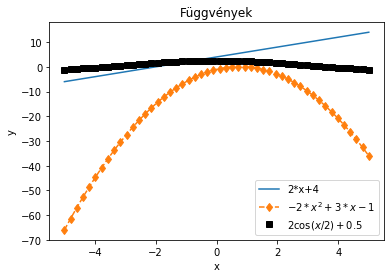

In [20]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5,5,50)       # 50 elemű array létrehozása -5 és 5 között
# y értékek létrehozása x függvényében
y1 = 2*x+4
y2 = -2*x**2 + 3*x - 1
y3 = 2*np.cos(x/2)+0.5

# a plot függvénnyel lehet ábrázolni függvényeket; a label paraméter
# értéke határozza meg, hogy mi jelenik meg a jelmagyarázatban
plt.plot(x,y1, label = '2*x+4')
# harmadik paraméterként megadtuk, hogy szaggatott vonalat (--) szeretnénk
# diamant markerokkal (d)
plt.plot(x,y2, '--d', label = '$-2*x^2 + 3*x - 1$')
# harmadik paraméterként megadtuk, hogy négyzet markert (s) szeretnénk
# fekete színben (k)
plt.plot(x,y3, 'sk', label = '$2\cos(x/2)+0.5$')
plt.legend()             # megjeleníti a jelmagyarázatot
plt.title('Függvények')  # megjeleníti az ábra címét
plt.xlabel('x')          # elnevezi az x tengelyt
plt.ylabel('y')          # elnevezi az y tengelyt
plt.show()               # megjeleníti az ábrát

### A mért eredmények ábrázolása

Miután összerakjuk az eddig leírt elemeket, már csak az ábrázolás marad hátra. Megadjuk, hogy kör alakú markerekkel és azokat összekötő egyenessel ```'o-'``` szeretnénk plottolni a ```d``` függvényében a ```t```-t. Mivel az *x* tengely itt dátumokat tartalmaz, a ```plt.gcf().autofmt_xdate()``` parancsot hívjuk meg, hogy csinosabban jelenítse meg a dátumokat (nyugodtan próbáljuk ki, mi lesz, ha ezt nem használjuk). Végül a ```plt.show()```-val megjelenítjük a grafikont. 

```ds18b20_readfile.py```:

In [ ]:
import matplotlib.pyplot as plt
import datetime as dt

filename = 'test.csv'

def read_temp_raw(file_name):
    f = open(file_name, 'r')
    lines = f.readlines()
    f.close()
    return lines

def read_data(lines, delimiter=','):
	date = []
	tc = []
	for line in lines[1:]:
		a = line.strip().split(',')
		dd = dt.datetime.strptime(a[0], '%Y-%m-%d %H:%M:%S')
		date.append(dd)
		tc.append(float(a[1]))
	return date, tc

lines = read_temp_raw(filename)
d,t = read_data(lines, delimiter=',')

plt.plot(d,t, 'o-')
plt.gcf().autofmt_xdate()
plt.show()

## A projekt tesztelése

Miután összeszereltük az áramkört és a kódot is megírtuk, amit pl. ```ds18b20_readfile.py``` név alatt mentettünk el, megnyithatunk a Raspberry Pi operációs rendszerén egy terminált. A terminálban a ```cd 'mappa név'``` paranccsal elnavigálunk abba a mappába, ahova a ```ds18b20_readfile.py```-t elmentettük. Ott begépelve a ```python ds18b20_readfile.py``` parancsot, letesztelhetjük a programunk működését. Ha minden jól megy akkor a program elindításával az elmentett adatok beolvasódnak és egy grafikon jelenik meg a hőmérséklettel az idő függvényében.

Hibaüzenetek esetén ki kell deríteni mi lehetett a probléma, pl. elgépelés, egy modul hiányzik, sorok megfelelő behúzása, idézőjel lemaradása stb. A hibaüzenet legtöbbször segít abban, hogy melyik sorban találta a hibát és hogy mi volt az. Egy kis gyakorlással bele lehet jönni azok értelmezésébe, valamint interneten is rá lehet keresni a hibaüzenet jelentésére és annak lehetséges elhárítására.

## Mit lehet javítani/továbbfejleszteni?

* Adjunk címet a grafikonnak és változtassuk meg a tengelyek számméretét.
* Változtassuk meg a görbe típusát (pl. szaggatott vonal négyzetekkel) illetve nagyítsunk rá mind az x és y tengelyre a kódból.

Írd meg kommentben, hogy szerinted mivel lehetne még feldobni ezt a kis programot!

## Referencia

1) https://thepihut.com/blogs/raspberry-pi-tutorials/18095732-sensors-temperature-with-the-1-wire-interface-and-the-ds18b20

2) http://docs.37sensors.com/#

3) https://sensorkit.en.joy-it.net/index.php?title=KY-028_Temperature_Sensor_module_(Thermistor)

4) https://www.malnasuli.hu/leckek/homerseklet-merese-1-wire-szenzorral/

5) https://www.electronicshub.org/raspberry-pi-ds18b20-tutorial/

6) open parancs - https://www.guru99.com/reading-and-writing-files-in-python.html

7) string metódusok - https://www.programiz.com/python-programming/string

8) datetime csomag - https://www.programiz.com/python-programming/datetime

9) matplotlib csomag - https://matplotlib.org/stable/tutorials/index.html